In [9]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Point, Polygon
import seaborn as sns


In [10]:
service_requests = pd.read_csv('Cityworks_Service_requests.csv')

C:\Users\John\AppData\Local\Temp\ipykernel_20828\2172475878.py:1: DtypeWarning: Columns (4,5,15,23,26,32,33,34,35,36,38,40,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  service_requests = pd.read_csv('Cityworks_Service_requests.csv')


In [11]:
service_requests.head()

,X,Y,OBJECTID,REQUESTID,WORKORDERID,CSRNUMBER,DESCRIPTION,STATUS,REQUESTCATEGORY,INITIATEDDATE,...,XCOORD,YCOORD,ONSEGX,ONSEGY,LONGITUDE,LATITUDE,SQUARE,SUFFIX,LOT,GlobalID
0,-77.080627,38.907502,1,1180,NaN,13-00079017,SIDEWALK REPAIR,CLOSED,ASSET MANAGEMENT,2013/04/09 15:29:30+00,...,393028.947,137734.323,393007.048,137740.271,-77.080625,38.907494,NaN,NaN,NaN,{850B9583-7B42-435E-8E8F-2F5CB18514A6}
1,-77.019901,38.966142,2,318742,173022.0,10-00188633,SIDEWALK REPAIR,CLOSED,TOA-S&B,2014/12/13 16:13:19+00,...,398276.000,144247.000,398275.520,144247.010,-77.019899,38.966135,NaN,NaN,NaN,{23FE3016-8AB7-4D08-9A5F-88FFF25AB30A}
2,-76.977380,38.900201,3,319057,NaN,09-03080547,SIDEWALK REPAIR,CLOSED,TOA-S&B,2014/12/13 09:06:00+00,...,401962.560,136905.010,401962.331,136926.993,-76.977378,38.900193,NaN,NaN,NaN,{7941D7F9-3D7A-4482-B683-5BB5651208FA}
3,-77.037800,38.981526,4,336725,176308.0,09-03124614,CURB GUTTER REPAIR,CLOSED,TOA-S&B,2014/12/13 20:33:12+00,...,396703.150,145955.370,396725.013,145955.259,-77.037798,38.981519,NaN,NaN,NaN,{261D668F-29D8-486E-BB43-079B56A11205}
4,-77.013652,38.958036,5,453046,430780.0,10-00155132,CURB GUTTER REPAIR,CLOSED,TOA-S&B,2014/08/09 12:02:17+00,...,398816.920,143347.000,398816.917,143346.999,-77.013650,38.958028,NaN,NaN,NaN,{14F68CAB-D322-4BAF-999A-61A5B4C755EA}


In [12]:
service_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304355 entries, 0 to 1304354
Data columns (total 56 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   X                     1304355 non-null  float64
 1   Y                     1304355 non-null  float64
 2   OBJECTID              1304355 non-null  int64  
 3   REQUESTID             1304355 non-null  int64  
 4   WORKORDERID           260071 non-null   object 
 5   CSRNUMBER             1001961 non-null  object 
 6   DESCRIPTION           1304355 non-null  object 
 7   STATUS                1304341 non-null  object 
 8   REQUESTCATEGORY       1275432 non-null  object 
 9   INITIATEDDATE         1304334 non-null  object 
 10  CLOSEDDATE            1279404 non-null  object 
 11  INSPECTIONDATE        1290099 non-null  object 
 12  INSPECTIONCOMPLETE    1304336 non-null  object 
 13  SUBMITTEDTODATE       283644 non-null   object 
 14  DISPATCHEDTODATE      178443 non-n

In [13]:
service_requests.columns

Index(['X', 'Y', 'OBJECTID', 'REQUESTID', 'WORKORDERID', 'CSRNUMBER',
       'DESCRIPTION', 'STATUS', 'REQUESTCATEGORY', 'INITIATEDDATE',
       'CLOSEDDATE', 'INSPECTIONDATE', 'INSPECTIONCOMPLETE', 'SUBMITTEDTODATE',
       'DISPATCHEDTODATE', 'CANCELEDDATE', 'PRIORITY', 'INITIATEDBY',
       'SUBMITTEDTO', 'DISPATCHEDTO', 'CLOSEDBY', 'PROJECTNAME', 'ISCANCELED',
       'CANCELEDBY', 'ADDRESS', 'FISCALYEAR', 'WARD', 'QUADRANT', 'ZIPCODE',
       'ANC', 'SMD', 'NEIGHBORHOODCLUSTERS', 'NEIGHBORHOODNAMES', 'BID', 'AWI',
       'EDZ', 'NIF', 'HISTORICDISTRICT', 'ZONING', 'PUD', 'CFAR', 'PSA', 'PD',
       'DAYSTOCLOSE', 'DAYSTOINSPECT', 'UPDATEDATE', 'XCOORD', 'YCOORD',
       'ONSEGX', 'ONSEGY', 'LONGITUDE', 'LATITUDE', 'SQUARE', 'SUFFIX', 'LOT',
       'GlobalID'],
      dtype='object')

In [14]:
#Drop un needed cols
service_requests = service_requests[['OBJECTID', 'DESCRIPTION', 'STATUS', 'WARD', 'REQUESTCATEGORY','INITIATEDDATE','CLOSEDDATE','NEIGHBORHOODCLUSTERS', 'NEIGHBORHOODNAMES','DAYSTOCLOSE', 'LONGITUDE','LATITUDE', 'SUFFIX']]


In [15]:
service_requests.head(3)

,OBJECTID,DESCRIPTION,STATUS,WARD,REQUESTCATEGORY,INITIATEDDATE,CLOSEDDATE,NEIGHBORHOODCLUSTERS,NEIGHBORHOODNAMES,DAYSTOCLOSE,LONGITUDE,LATITUDE,SUFFIX
0,1,SIDEWALK REPAIR,CLOSED,2,ASSET MANAGEMENT,2013/04/09 15:29:30+00,2013/07/21 15:01:41+00,Cluster 13,Foxhall Village,103,-77.080625,38.907494,NaN
1,2,SIDEWALK REPAIR,CLOSED,4,TOA-S&B,2014/12/13 16:13:19+00,2014/12/13 14:52:48+00,Cluster 17,Brightwood,0,-77.019899,38.966135,NaN
2,3,SIDEWALK REPAIR,CLOSED,5,TOA-S&B,2014/12/13 09:06:00+00,2014/12/13 14:40:07+00,Cluster 23,Carver,0,-76.977378,38.900193,NaN


In [16]:
#The date and time column are currently strings, convert them to a date time object

def convertToDate(row):
    row.INITIATEDDATE = pd.to_datetime(row.INITIATEDDATE)
    row.CLOSEDDATE = pd.to_datetime(row.CLOSEDDATE)
    #row.SUBMITTEDTODATE = pd.to_datetime(row.SUBMITTEDTODATE)
    #row.DISPATCHEDTODATE = pd.to_datetime(row.DISPATCHEDTODATE)

    return row

In [17]:
service_requests = service_requests.apply(convertToDate, axis=1)

In [18]:
service_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304355 entries, 0 to 1304354
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype              
---  ------                --------------    -----              
 0   OBJECTID              1304355 non-null  int64              
 1   DESCRIPTION           1304355 non-null  object             
 2   STATUS                1304341 non-null  object             
 3   WARD                  1304346 non-null  object             
 4   REQUESTCATEGORY       1275432 non-null  object             
 5   INITIATEDDATE         1304334 non-null  datetime64[ns, UTC]
 6   CLOSEDDATE            1279404 non-null  datetime64[ns, UTC]
 7   NEIGHBORHOODCLUSTERS  1254727 non-null  object             
 8   NEIGHBORHOODNAMES     771190 non-null   object             
 9   DAYSTOCLOSE           1304355 non-null  int64              
 10  LONGITUDE             1304355 non-null  float64            
 11  LATITUDE              1304355 non-nul

In [19]:
service_requests_2020 = service_requests[service_requests.INITIATEDDATE.dt.year > 2019]

In [20]:
service_requests_2020.to_csv('service_requests_2020.csv')


In [21]:
service_requests_2020 = pd.read_csv('service_requests_2020.csv') # For my sanity, filtering the values takes 10+ minutes

C:\Users\John\AppData\Local\Temp\ipykernel_20828\629765289.py:1: DtypeWarning: Columns (4,9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  service_requests_2020 = pd.read_csv('service_requests_2020.csv') # For my sanity, filtering the values takes 10+ minutes


In [22]:
service_requests_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264348 entries, 0 to 264347
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            264348 non-null  int64  
 1   OBJECTID              264348 non-null  int64  
 2   DESCRIPTION           264348 non-null  object 
 3   STATUS                264344 non-null  object 
 4   WARD                  264339 non-null  object 
 5   REQUESTCATEGORY       239805 non-null  object 
 6   INITIATEDDATE         264348 non-null  object 
 7   CLOSEDDATE            246857 non-null  object 
 8   NEIGHBORHOODCLUSTERS  250940 non-null  object 
 9   NEIGHBORHOODNAMES     169634 non-null  object 
 10  DAYSTOCLOSE           264348 non-null  int64  
 11  LONGITUDE             264348 non-null  float64
 12  LATITUDE              264348 non-null  float64
 13  SUFFIX                3819 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 28.

In [23]:
service_requests_2020.head(3)

,Unnamed: 0,OBJECTID,DESCRIPTION,STATUS,WARD,REQUESTCATEGORY,INITIATEDDATE,CLOSEDDATE,NEIGHBORHOODCLUSTERS,NEIGHBORHOODNAMES,DAYSTOCLOSE,LONGITUDE,LATITUDE,SUFFIX
0,973465,981521,STREETLIGHT REPAIR,CLOSED,2,STREETLIGHT,2020-01-01 00:00:38+00:00,2020-01-04 03:34:02+00:00,Cluster 5,NaN,3,-77.052253,38.901874,NaN
1,973681,981737,PARKING METER REQUES,CLOSED,6,TOA-CW,2020-01-01 07:11:40+00:00,2020-01-02 11:00:15+00:00,Cluster 9,NaN,1,-77.017996,38.885825,NaN
2,973682,981738,PARKING METER REQUES,CLOSED,3,TOA-CW,2020-01-01 10:35:06+00:00,2020-01-02 07:45:15+00:00,Cluster 15,NaN,1,-77.052013,38.923719,NaN


In [43]:
service_requests_2020 = service_requests_2020.apply(convertToDate, axis=1)

Analyze the data

In [30]:
#Check how many calls are being answered in each neighborhood
service_requests_2020.WARD.value_counts()

2      40516
6      28775
4      27234
3      26457
5      24918
7      20850
1      17374
8      12680
2       9930
6       8278
4       7377
3       6045
5       5903
7       4424
1       4389
2.0     4231
8       2807
6.0     2463
4.0     2154
5.0     2090
3.0     2058
1.0     1404
7.0     1151
8.0      830
N          1
Name: WARD, dtype: int64

In [34]:
#Drop the one row which is not a numeric type for WARD
service_requests_2020 = service_requests_2020[service_requests_2020.WARD != 'N']

In [35]:
service_requests_2020.WARD = pd.to_numeric(service_requests_2020.WARD)

<Axes: xlabel='WARD', ylabel='DAYSTOCLOSE'>

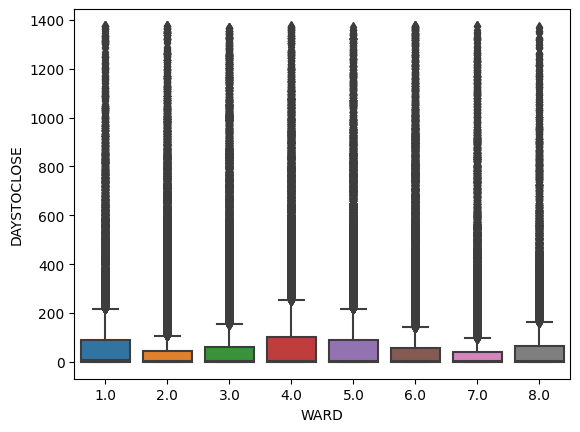

In [36]:
sns.boxplot(x=service_requests_2020['WARD'], y=service_requests_2020['DAYSTOCLOSE'])

<Axes: xlabel='INITIATEDDATE', ylabel='DAYSTOCLOSE'>

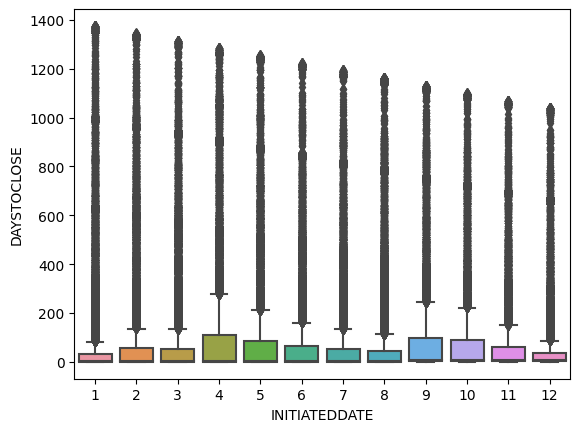

In [45]:
sns.boxplot(x=service_requests_2020.INITIATEDDATE.dt.month, y=service_requests_2020['DAYSTOCLOSE'])


<Axes: xlabel='INITIATEDDATE', ylabel='DAYSTOCLOSE'>

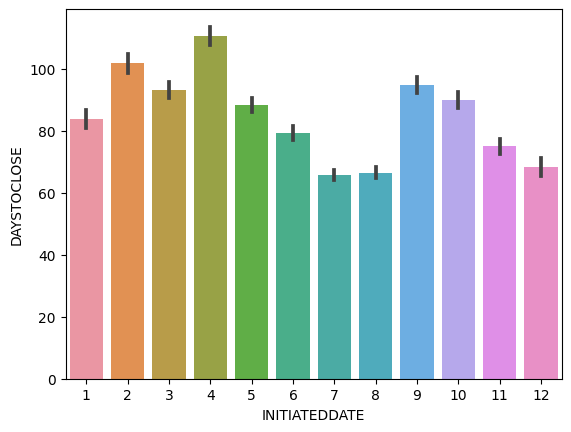

In [46]:
sns.barplot(x=service_requests_2020.INITIATEDDATE.dt.month, y=service_requests_2020['DAYSTOCLOSE'])

In [ ]:
sns.scatterplot(x=service_requests_2020)

In [37]:
service_requests_2020.corr()

,Unnamed: 0,OBJECTID,WARD,DAYSTOCLOSE,LONGITUDE,LATITUDE
Unnamed: 0,1.000000,0.999998,0.028445,-0.244711,0.056816,-0.037072
OBJECTID,0.999998,1.000000,0.028531,-0.244710,0.056866,-0.037077
WARD,0.028445,0.028531,1.000000,0.000247,0.727993,-0.494213
DAYSTOCLOSE,-0.244711,-0.244710,0.000247,1.000000,-0.009589,0.044529
LONGITUDE,0.056816,0.056866,0.727993,-0.009589,1.000000,-0.469676
LATITUDE,-0.037072,-0.037077,-0.494213,0.044529,-0.469676,1.000000


Plot the incidents
I followed a tutorial from:https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73

c:\Users\John\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

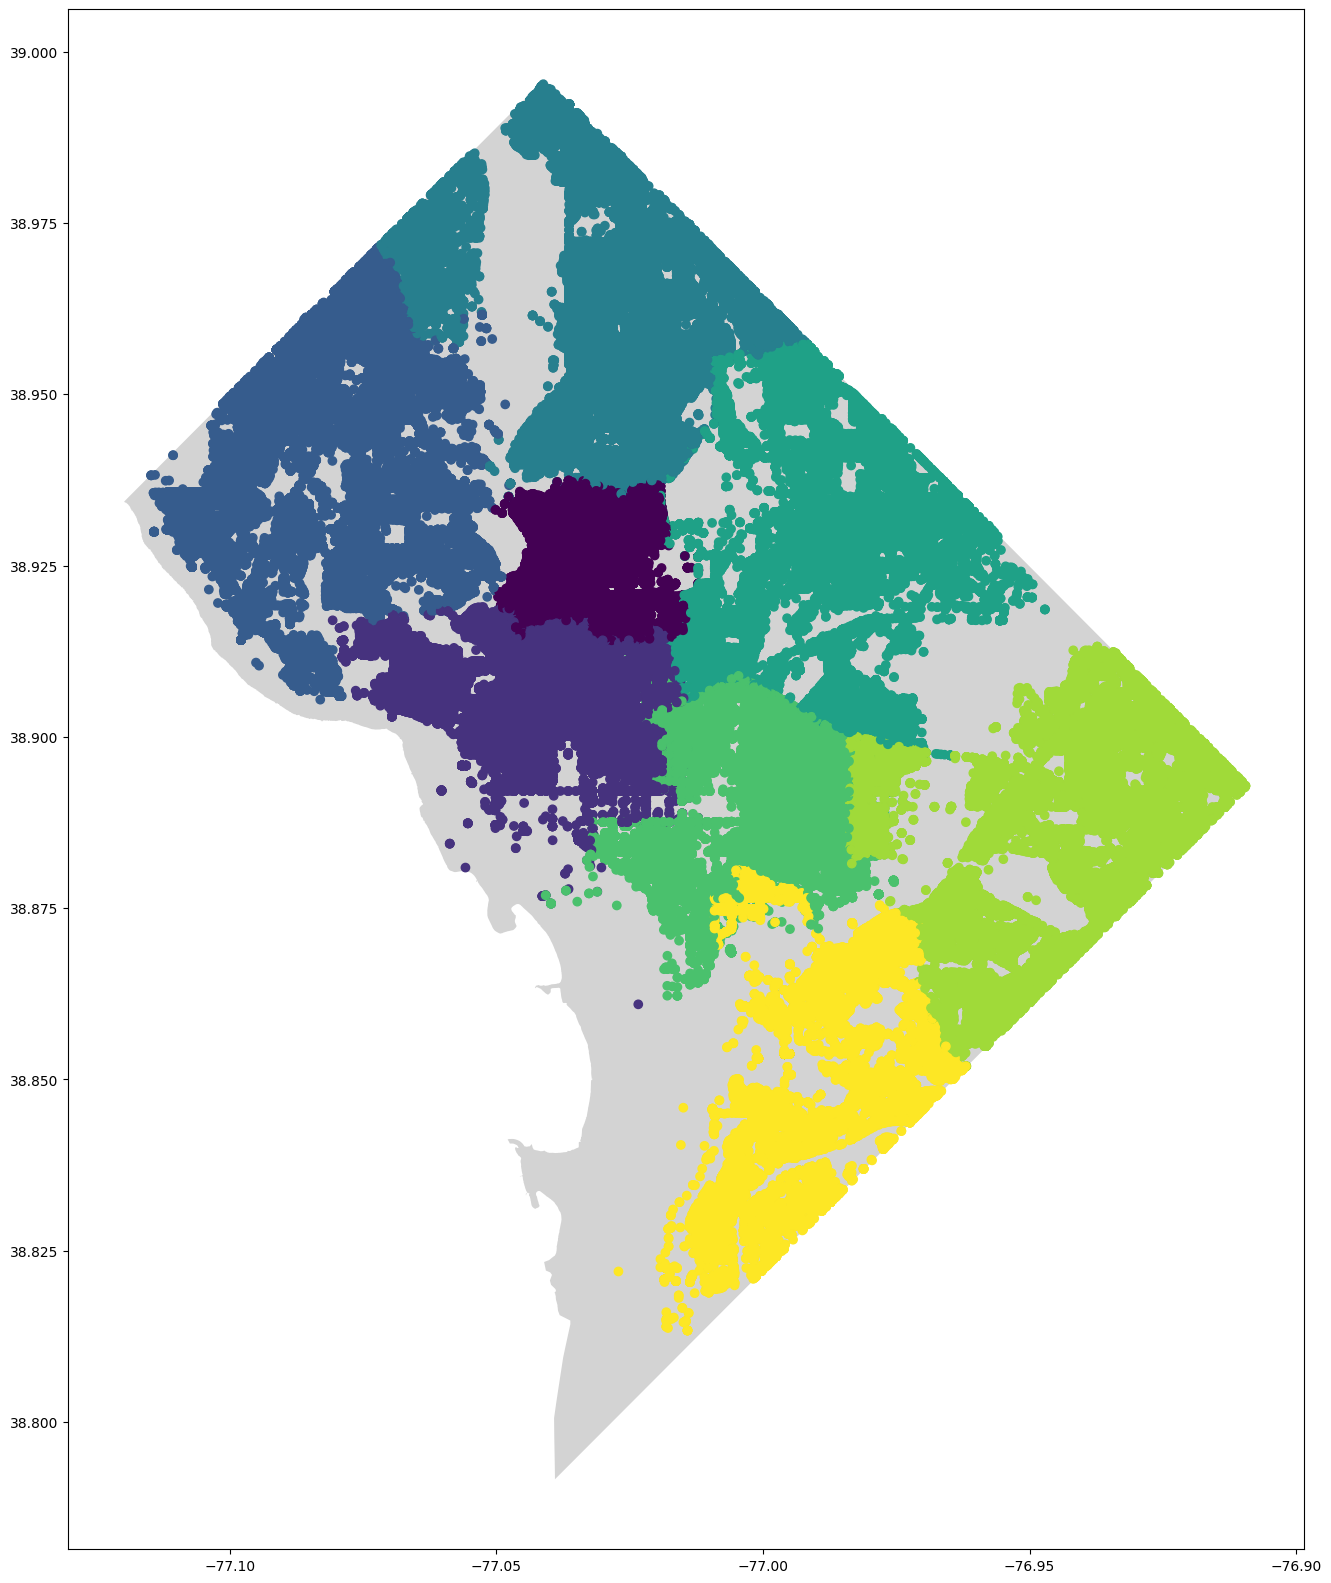

In [38]:
dc_map = gpd.read_file('shapefile/Washington_DC_Boundary.shp')
crs = {'init':'EPSG:4326'}

geometry = [Point(xy) for xy in zip(service_requests_2020['LONGITUDE'], service_requests_2020['LATITUDE'])]

geo_df = gpd.GeoDataFrame(service_requests_2020,
        crs = crs,
        geometry=geometry)
fix, ax = plt.subplots(figsize = (20,20))
dc_map.to_crs(epsg=4326).plot(ax=ax,color='lightgrey')
geo_df.plot(ax=ax, column=geo_df['WARD'])
#plt.show()


#dc_map.to_crs(epsg=4326).plot()
#dc_map.plot()

c:\Users\John\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


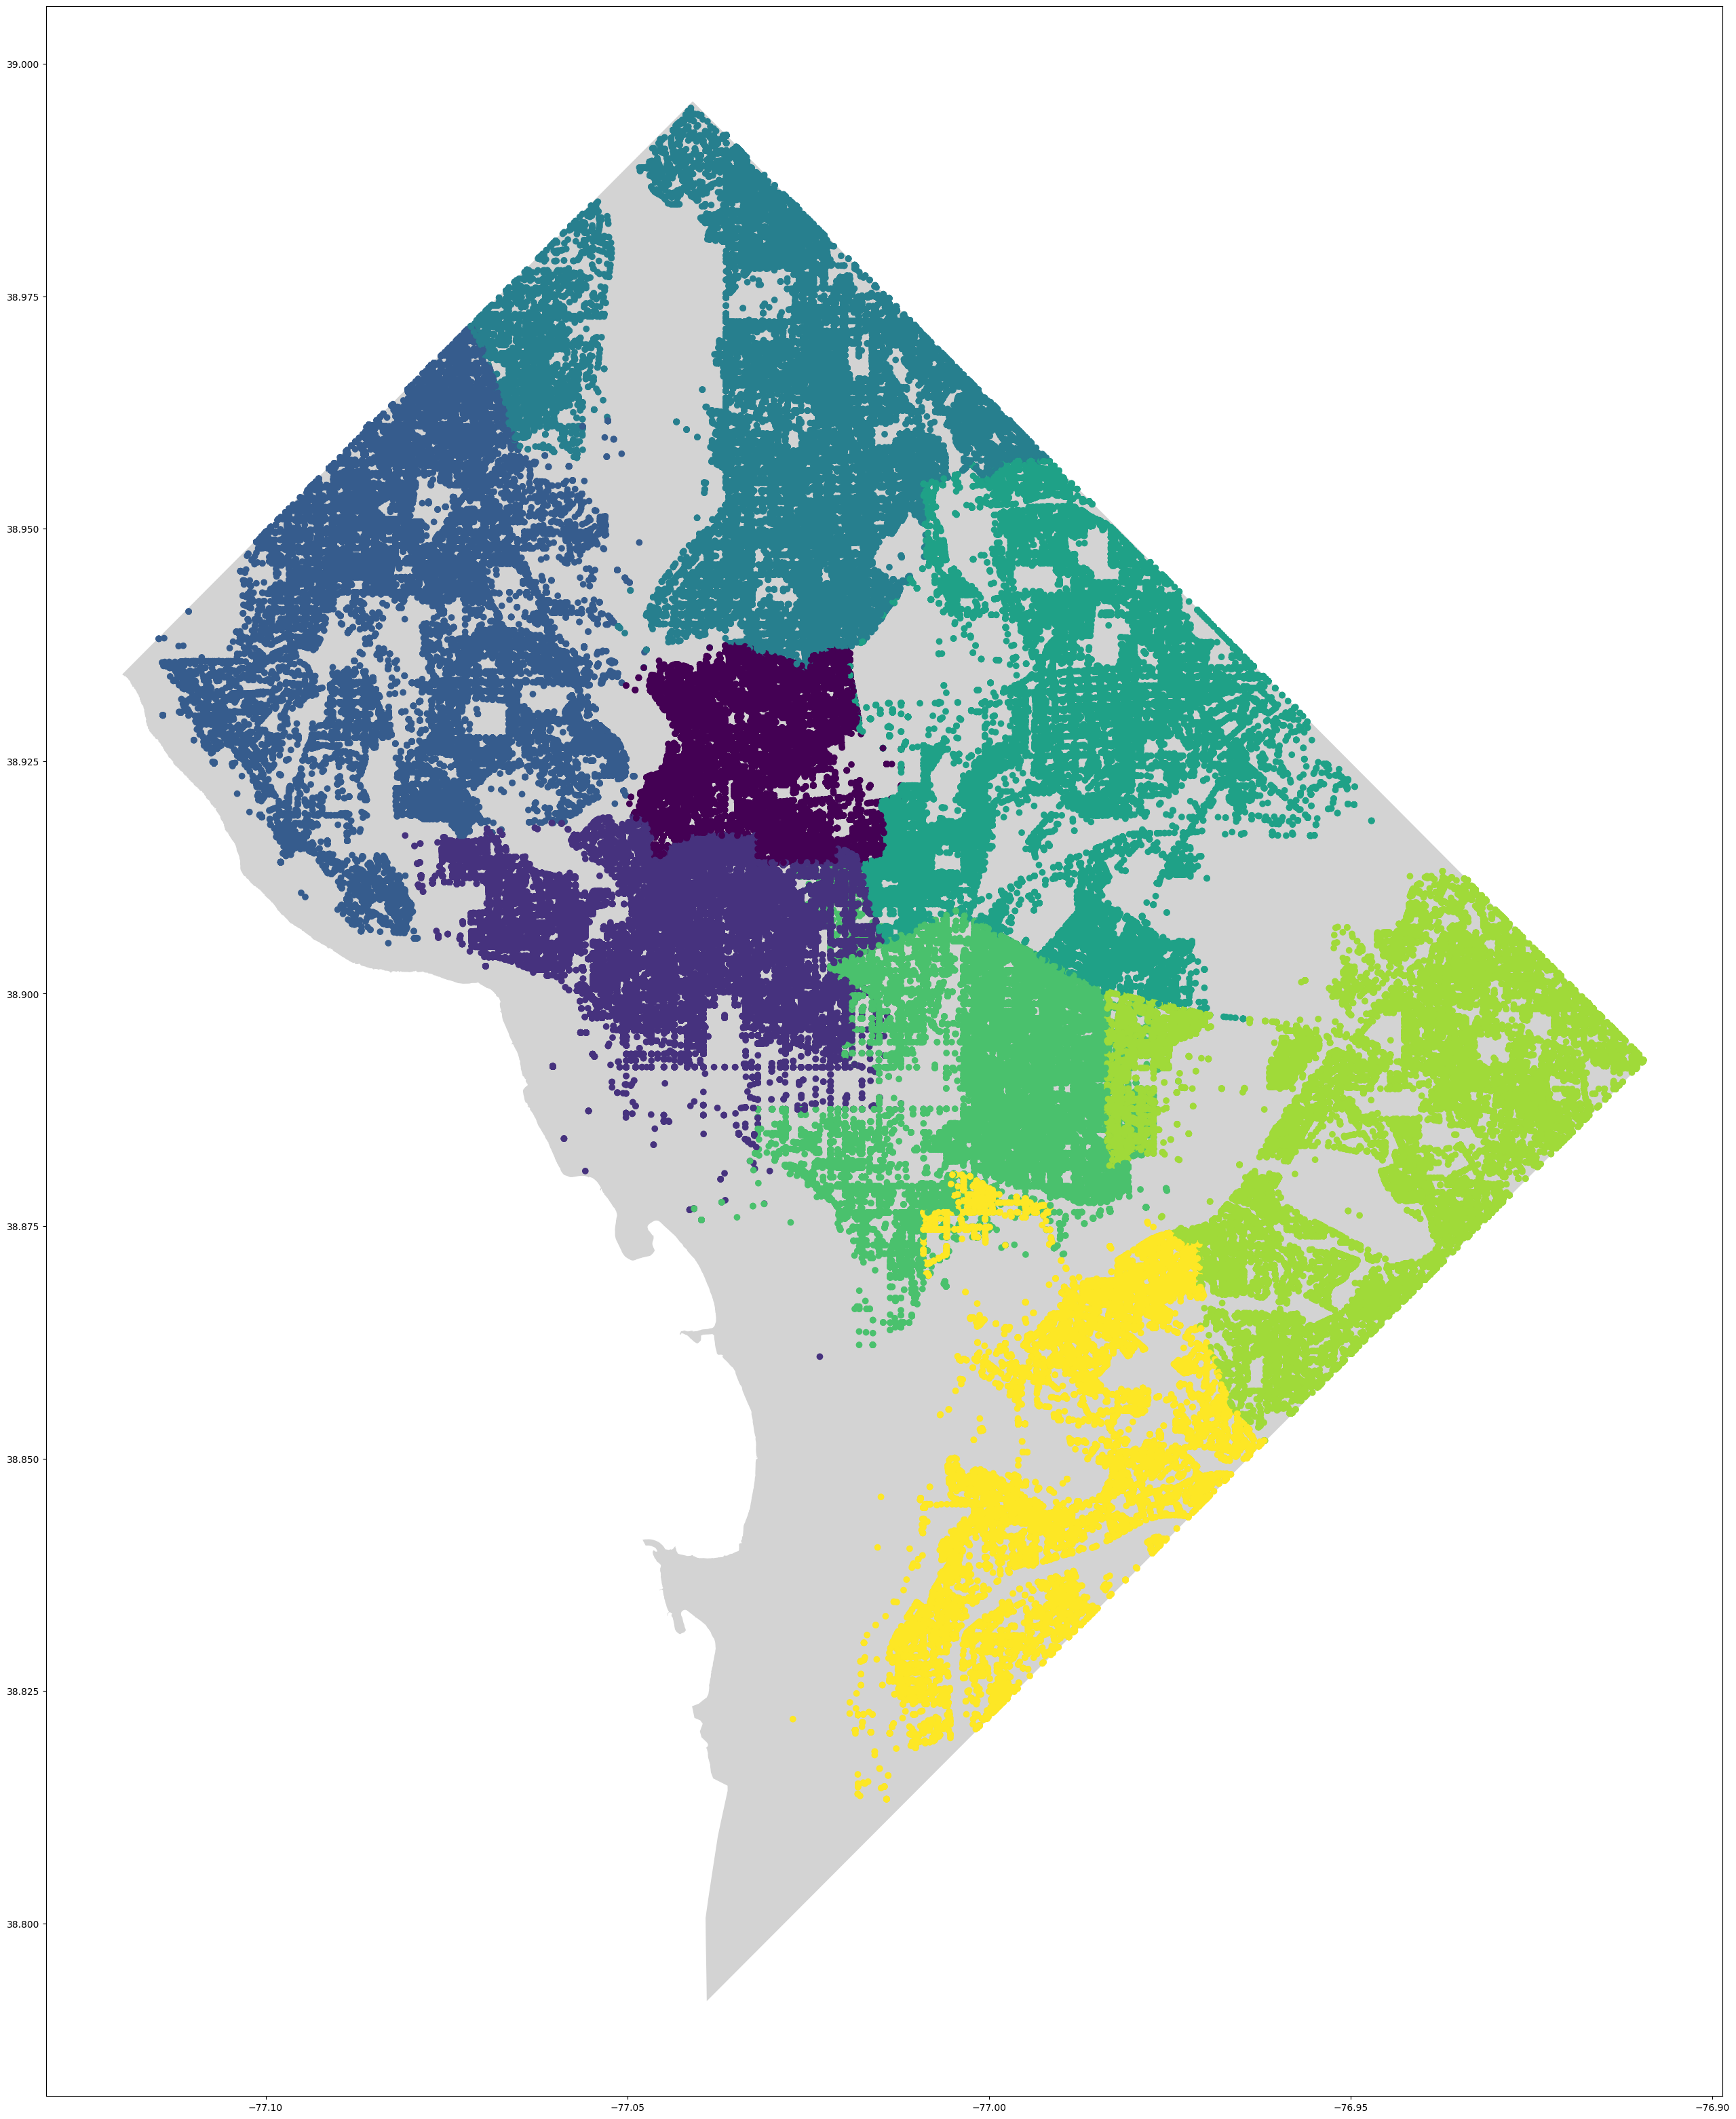

In [49]:
dc_map = gpd.read_file('shapefile/Washington_DC_Boundary.shp')
crs = {'init':'EPSG:4326'}

geometry = [Point(xy) for xy in zip(service_requests_2020['LONGITUDE'], service_requests_2020['LATITUDE'])]

geo_df = gpd.GeoDataFrame(service_requests_2020,
        crs = crs,
        geometry=geometry)
fix, ax = plt.subplots(figsize = (40,40))
dc_map.to_crs(epsg=4326).plot(ax=ax,color='lightgrey')
geo_df.plot(ax=ax, column=geo_df['WARD'])
plt.savefig('dc.jpg')